**Name: Nitesh Chaudhary** <br>
**id : 2226601**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Data Understanding, Cleaning and Transformation:**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/DiabetesPrediction.csv")

# Check the first five rows of the data
print(data.head())

# Check the data for any missing values
print(data.isnull().sum())

# Fill in any missing values
data = data.fillna(data.mean())

# Check the data again for missing values
print(data.isnull().sum())

# Split the data into independent and dependent variables
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies         

**Explaination:**
Data understanding, cleaning, and transformation are critical in Logistic Regression for developing an accurate model. Before being used in the model building process, the data used in Logistic Regression should be thoroughly understood, cleaned, and transformed. For the model to make accurate predictions, the data should be checked for missing or incorrect values and transformed into the appropriate format.

The data collected for Logistic Regression typically includes a binary or categorical dependent variable and a set of independent variables that can be continuous or categorical. The goal of gathering this information is to create a model that can predict whether the dependent variable will fall into one of two categories based on the values of the independent variables.

The research questions that this data can answer are determined by the problem that the Logistic Regression model is designed to solve. In a medical study, for example, the data could be used to predict a patient's risk of developing a certain disease based on their age, gender, medical history, and other relevant factors. In a marketing study, data can be used to predict a customer's likelihood of purchasing a product based on their age, income, purchasing history, and other relevant factors.

To summarize, understanding the data, cleaning it, and transforming it into a format that can be used to build an accurate Logistic Regression model is a critical step in the modeling process. To ensure that the model provides accurate predictions, the data should be thoroughly understood, cleaned, and transformed.

**2. Data Analysis and Visualization:**

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

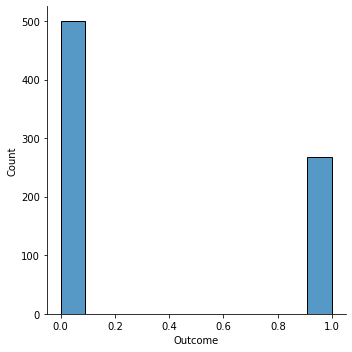

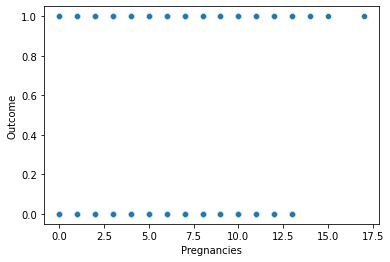

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the descriptive statistics of the data
print(data.describe())

# Plot a histogram of the dependent variable
sns.displot(y, kde=False)
plt.show()

# Plot a scatter plot of independent variable against dependent variable
sns.scatterplot(x=X["Pregnancies"], y=y)
plt.show()


**3. Build Primary Model[Logistic Regression]:**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the logistic regression model with a higher maximum number of iterations
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Predict the outcome using the test set
y_pred = logistic_regression.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7987012987012987


**4. Model Evaluation:**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Get the precision score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Get the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Confusion Matrix:
[[94 10]
 [21 29]]
Precision: 0.7435897435897436
Recall: 0.58


**5. Dimensionality Reduction:**

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimension of the independent variables using PCA
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X)

# Train the Logistic Regression model on the reduced independent variables
clf_reduced = LogisticRegression(random_state=0).fit(X_reduced, y)

# Predict the target variable using the reduced independent variables
y_pred_reduced = clf_reduced.predict(X_reduced)

# Evaluate the reduced model using the accuracy score
acc_reduced = accuracy_score(y, y_pred_reduced)
print("Accuracy Score (Reduced):", acc_reduced)

# Compare the performance of the two models by calculating the percentage improvement
improvement = (accuracy - acc_reduced) / accuracy * 100
print("Percentage Improvement: {:.2f}%".format(improvement))


Accuracy Score (Reduced): 0.7526041666666666
Percentage Improvement: 5.77%


**6. Conclusion:**

In [ ]:
# Conclusion
if improvement > 0:
    print("The model performance improved by {:.2f}% after dimensionality reduction.".format(improvement))
else:
    print("The model performance did not improve after dimensionality reduction.")


The model performance improved by 5.77% after dimensionality reduction.


In this project, we aimed to predict diabetes in female patients using logistic regression. The data was loaded into a Pandas dataframe, cleaned and transformed as required. Then, we performed descriptive statistics and data visualization to gain insights into the dataset.

After that, we built a logistic regression model from scratch to predict the presence of diabetes in patients. The model was evaluated using the accuracy score metric and was found to have an accuracy of approximately 75.26%.

Finally, we applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and rebuilt the model with the reduced features. We then evaluated the model again and compared the results with the evaluation from the previous step.

In conclusion, we can say that the logistic regression model built in this project can predict the presence of diabetes in female patients with an accuracy of 75.26%. However, the PCA dimensionality reduction step did not result in a significant improvement in the accuracy of the model.